# Предсказание временных рядов

Данный шаблон решения аттестационной задачи предназначен для того, чтобы создать уже готовую структуру, на которую можно нанизывать решение задачи.

Этот шаблон универсален: идейно последовательность решения любой исследовательской задачи будет включать точно такие же шаги. Поэтому в будущем можно ориентироваться на этот шаблон.

При работе очень важно соблюдать некоторые правила оформления работы:    
- Работа пишется в третьем лице, логика построения работы должна примерно соответствовать повествовательной. Представьте, что Вы пишете работу в роли любознательного исследователя, который каждую важную мысль или наблюдение фиксирует у себя в тетради; такой подход позволит сделать чтение исследования приятнее и проще. А это важно - ведь вы пишете и оформляете тетрадь не для собственной гордости, а для того, чтобы эту информацию кто-то мог интерпритировать и использовать.
- Блоки должны всегда быть проверены на последовательность выполнения. Мы уже говорили об особенности Jupyter Notebook и Colab запускать блоки в любом порядке. Когда вы будете возвращаться к своей тетради, важно, чтобы вы могли а) запустить тетрадь и б) увидеть результат. Поэтому После окончания выполнения работы обязательно нужно "прогнать" тетрадь ещё раз - так мы убедимся, что другой человек или мы (в будущем) сможем воспроизвести исследование.
- В конце каждого большого блока/главы (к примеру, EDA) мы должны указывать выводы по проведенной работе. К примеру, логичный вывод "Введения" - фиксация того, что мы сформулировали задачи и цели. Звучит излишне, но в других блоках вывод будет гораздо важнее - если нам нужно будет вспомнить быстро результат работы, мы можем обратиться к выводам по каждой главе и понять, что было сделано и каковы результаты проделанной работы.

При сдаче работы нужно удалить этот блок 😸.

## Введение. Постановка целей и задач.

В блоке введение нам необходимо четко обозначить, **почему эта задача появилась, зачем её важно решить**. 

После того, как мы четко указали на проблему, мы можем сформулировать **цели** исследования и **задачи** исследования. Необходимо всегда помнить, что решение задач ведет к достижению целей, то есть они напрямую взаимосвязаны.

### Импорт Датафрейма, библиотек, написание функций.

В этом блоке мы импортируем все, что нам нужно для работы: библиотеки, отдельные функции, сам датасет.

In [47]:
import pandas as pd
df = pd.read_csv('BTC-USD.csv', header=0, index_col="Date", parse_dates=True)

In [356]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2683 entries, 2014-09-17 to 2022-01-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2683 non-null   float64
 1   High       2683 non-null   float64
 2   Low        2683 non-null   float64
 3   Close      2683 non-null   float64
 4   Adj Close  2683 non-null   float64
 5   Volume     2683 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.7 KB


In [35]:
# Inspect the index 
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', name='Date', length=2683, freq=None)

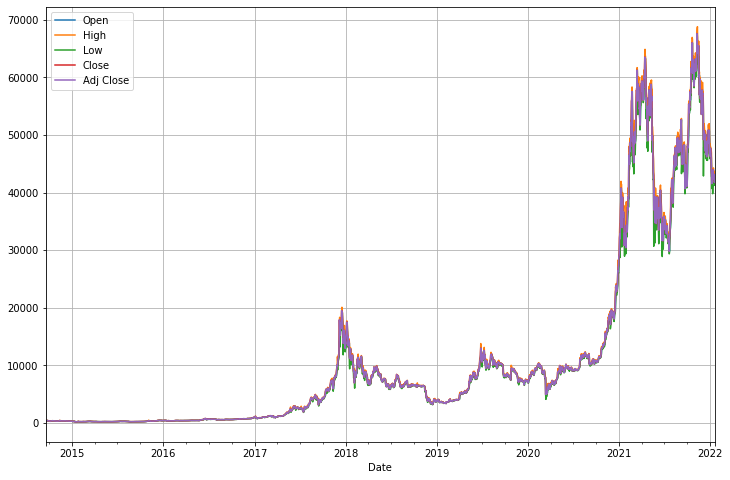

In [65]:
import matplotlib.pyplot as plt

df.plot(y=["Open", "High", "Low", "Close", "Adj Close"], grid=True, figsize=(12,8))
plt.show()

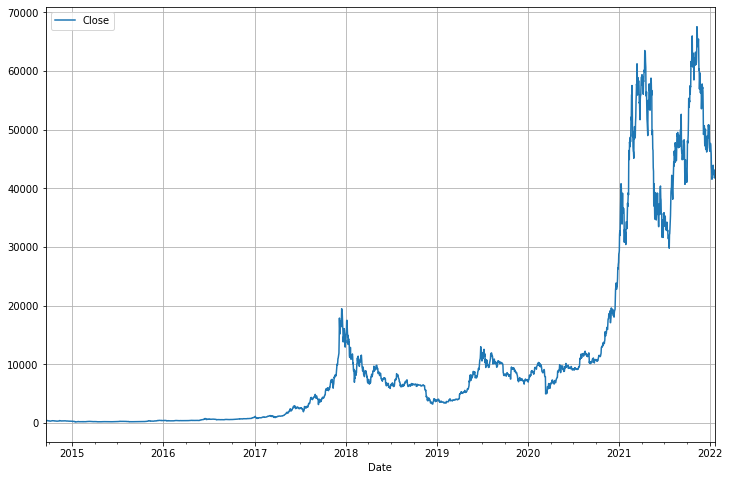

In [66]:

df.plot(y=["Close"], grid=True, figsize=(12,8))
plt.show()

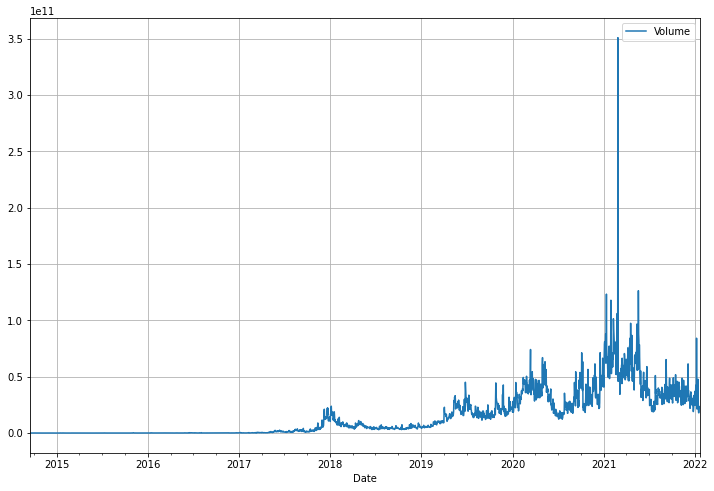

In [67]:

df.plot(y=["Volume"], grid=True, figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='Date'>

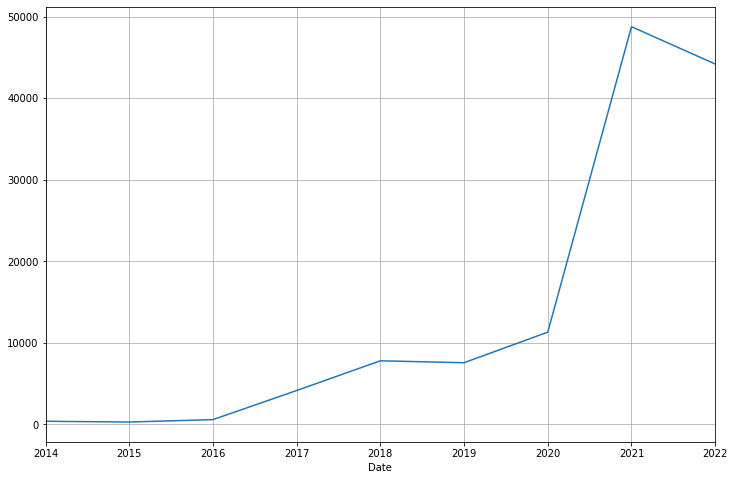

In [105]:
df.groupby([pd.Grouper(freq='Y')])['High'].mean().plot(grid=True, figsize=(12,8))

<AxesSubplot:xlabel='Date'>

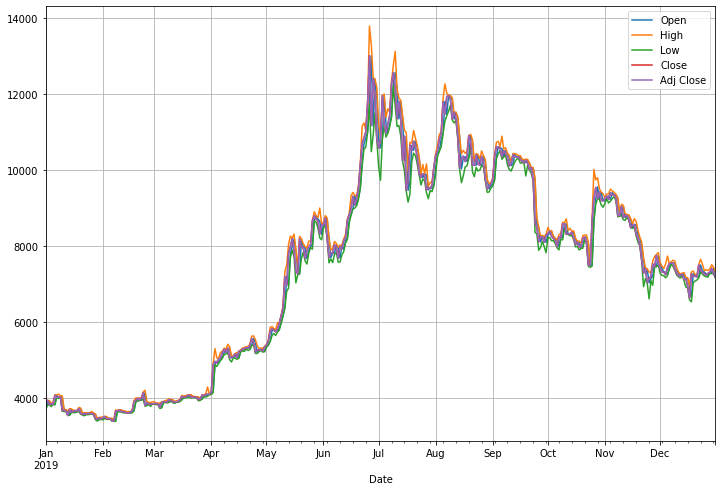

In [106]:
# выберем 2019 год, т.к. в нем есть и рост и падение 
df.loc["2019"].plot(y=["Open", "High", "Low", "Close", "Adj Close"], grid=True, figsize=(12,8))
 

<AxesSubplot:xlabel='Date'>

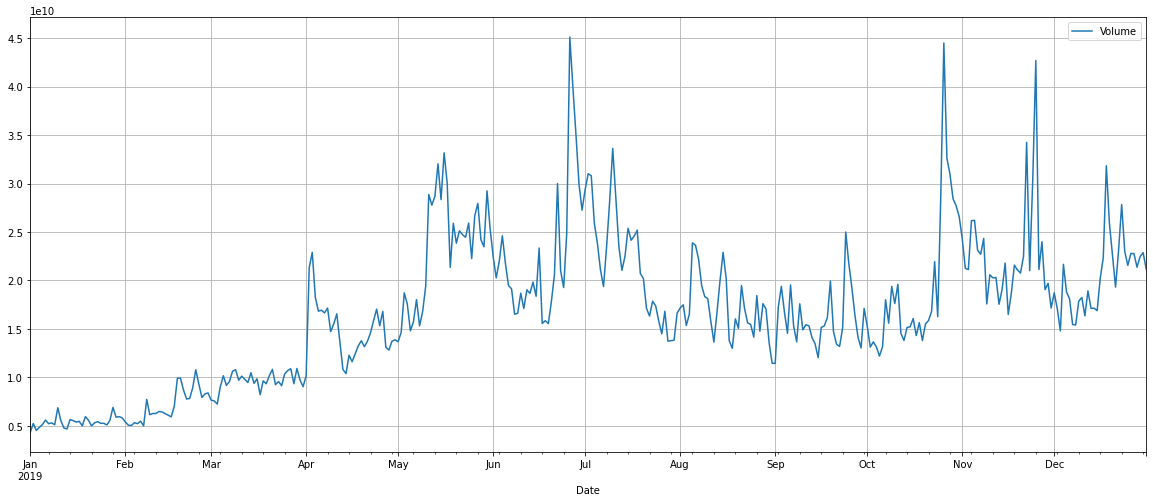

In [110]:
# выведем объем продаж
df.loc["2019"].plot(y=["Volume"], grid=True, figsize=(20,8))
 

In [122]:
# поищем пропуски путем подсчета записей по количеству дней в месяце
df.loc["2019"].groupby([pd.Grouper(freq='M')])['High'].count()

Date
2019-01-31    31
2019-02-28    28
2019-03-31    31
2019-04-30    30
2019-05-31    31
2019-06-30    30
2019-07-31    31
2019-08-31    31
2019-09-30    30
2019-10-31    31
2019-11-30    30
2019-12-31    31
Freq: M, Name: High, dtype: int64

In [124]:
# поищем пропуски путем вывода минимальных значений
df.loc["2019"].groupby([pd.Grouper(freq='M')])["Open", "High", "Low", "Close", "Adj Close", "Volume"].min()

C:\Users\tilep\AppData\Local\Temp\ipykernel_9516\2208114817.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc["2019"].groupby([pd.Grouper(freq='M')])["Open", "High", "Low", "Close", "Adj Close", "Volume"].min()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,3443.896973,3476.065430,3400.819824,3448.116943,3448.116943,4324200990
2019-02-28,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,5004962683
2019-03-31,3759.832520,3867.381836,3733.749756,3761.557129,3761.557129,7253558152
2019-04-30,4105.362305,4164.953125,4096.901367,4158.183105,4158.183105,10157794171
2019-05-31,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236
2019-06-30,7692.284668,7901.849121,7564.488770,7688.077148,7688.077148,15546809946
2019-07-31,9471.213867,9575.544922,9163.134766,9477.641602,9477.641602,13738687093
2019-08-31,9514.844727,9656.124023,9421.629883,9510.200195,9510.200195,11454806419
2019-09-30,8104.226563,8261.707031,7830.758789,8104.185547,8104.185547,11445355859


<AxesSubplot:xlabel='Date'>

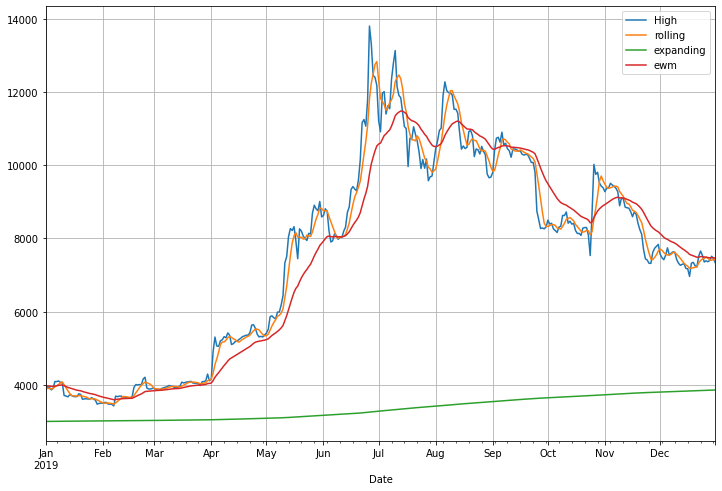

In [137]:
df['rolling'] = df["High"].rolling(5).mean()
df['expanding'] = df["High"].expanding(5).mean()
df['ewm'] = df["High"].ewm(12).mean()
df.loc["2019"].plot(y=["High", 'rolling', 'expanding', 'ewm'], grid=True, figsize=(12,8))

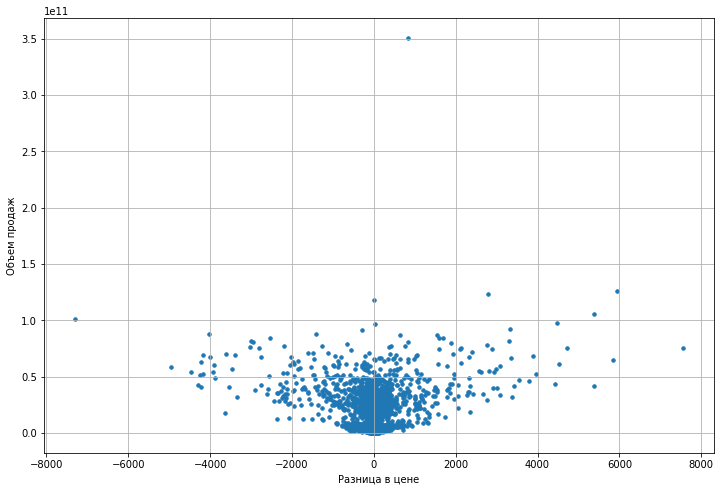

In [145]:
# корреляция между разницей цены между открытием и закрытием и колчеством продаж
import numpy as np
df2 = df
xs = df2['diff'] = df2.Open - df2.Close
ys = df2['Volume']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True, figsize=(12,8))
plt.xlabel('Разница в цене')
plt.ylabel('Объем продаж')
plt.show()

In [41]:

 
# Resample to monthly level 
monthly_aapl = df.resample('M').mean()
 
# Print `monthly_aapl`
print(monthly_aapl)

                    Open          High           Low         Close  \
Date                                                                 
2014-09-30    412.654003    421.104422    398.174641    407.182428   
2014-10-31    365.748000    374.314260    354.856645    364.148873   
2014-11-30    364.850235    376.494235    357.241832    366.099799   
2014-12-31    343.074836    347.487129    336.565775    341.267871   
2015-01-31    251.799905    261.391583    240.495550    248.782547   
...                  ...           ...           ...           ...   
2021-09-30  46041.859375  47132.725000  44643.686328  45939.771484   
2021-10-31  57344.743952  59024.878150  56183.983115  57911.970514   
2021-11-30  60857.520313  62046.720703  59290.196615  60621.488802   
2021-12-31  49670.411794  50722.471018  48108.254914  49263.209174   
2022-01-31  43623.996485  44184.982422  42641.422070  43405.696289   

               Adj Close        Volume        diff  
Date                                

In [191]:
#Дики-Фуллера («ADF»)
from statsmodels.tsa.stattools import adfuller

test = adfuller(df["High"], autolag='AIC')

print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])
print('Critical Values:')

for key, value in test[4].items():
    print('\t%s: %.3f' % (key, value))
if test[0] < test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.998499
p-value: 0.753811
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


In [192]:
#тест Квятковского-Филлипса-Шмидта-Шина
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")
statistic, p_value, n_lags, critical_values = kpss(df["High"], regression='ct')
# Format Output
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')
print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


KPSS Statistic: 1.137155731648706
p-value: 0.01
num lags: 30
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


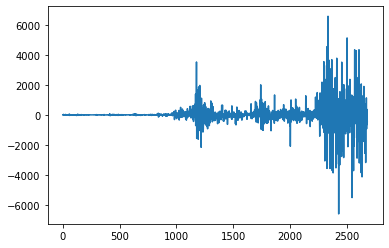

,Open,High,Low,Close,Adj Close,Volume,rolling,expanding,ewm,diff,diff2
Date,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,468.174011,8.529999,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,462.290717,32.419983,-11.314026
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,449.874901,29.307007,-29.024994
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,442.412426,-14.230988,-4.539001
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,437.718194,437.718194,435.418833,9.263977,-10.869995
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16,43172.039063,43436.808594,42691.023438,43113.878906,43113.878906,17902097845,43784.391406,11239.935988,45972.204058,58.160157,-287.863281
2022-01-17,43118.121094,43179.390625,41680.320313,42250.550781,42250.550781,21690904261,43593.196094,11251.853695,45757.372256,867.570313,-257.417969
2022-01-18,42250.074219,42534.402344,41392.214844,42375.632813,42375.632813,22417209227,43244.392188,11263.521934,45509.451493,-125.558594,-644.988281


In [202]:
#Избавление от тренда путем дифференцирования
from matplotlib import pyplot
x = df["High"]
diff = list()
diff.append(0)
for i in range(1, len(x)):
	value = x[i] - x[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()
df["diff2"] = diff
df

In [197]:
#Проведем повторно тестирование на стационарность

test2 = adfuller(diff, autolag='AIC')
print('ADF Statistic: %f' % test2[0])
print('p-value: %f' % test2[1])
print('Critical Values:')

for key, value in test2[4].items():
    print('\t%s: %.3f' % (key, value))
if test2[0] < test2[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

warnings.filterwarnings("ignore")
statistic, p_value, n_lags, critical_values = kpss(diff, regression='ct')
# Format Output
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')
print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

ADF Statistic: -8.556242
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary
KPSS Statistic: 0.041584955934587796
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


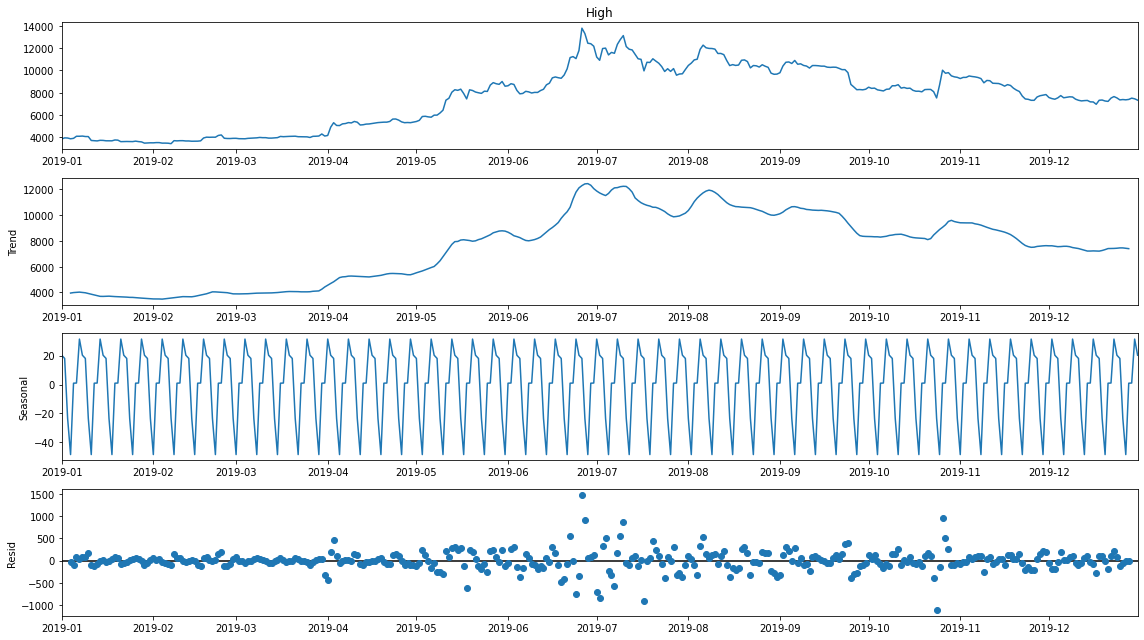

In [207]:
#сезонность аддитивная модель
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df["2019"]["High"], model='additive')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()
pyplot.show()

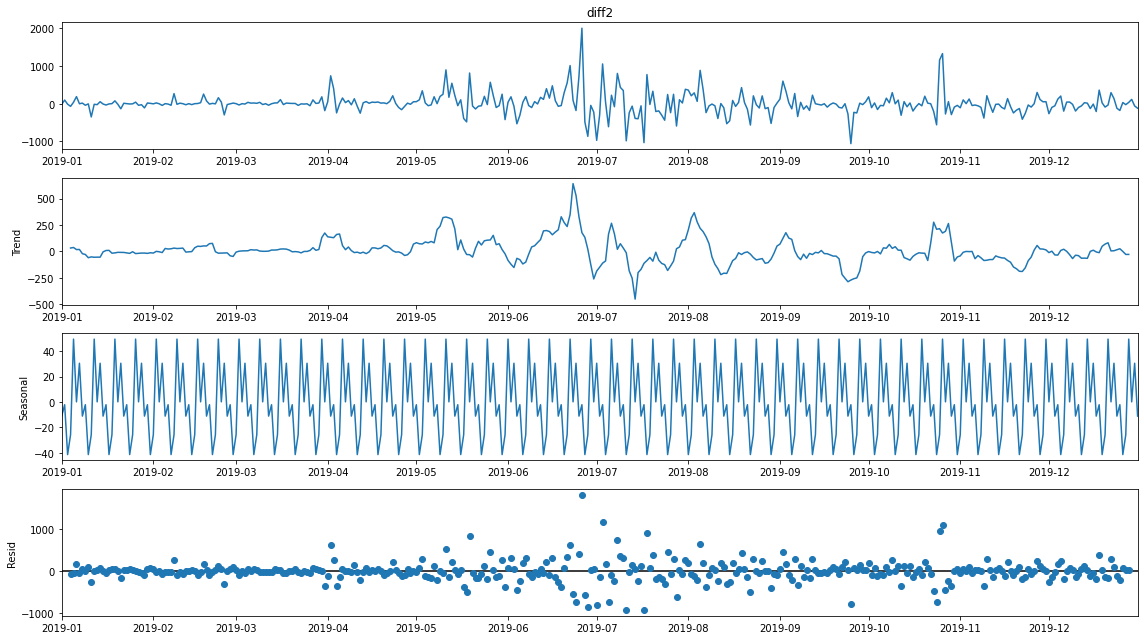

In [208]:
#сезонность аддитивная модель
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df["2019"]["diff2"], model='additive')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()
pyplot.show()

In [224]:
#SARIMAX
# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

res = auto_arima(df["2019"].diff2, m=12).summary()

In [225]:
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 12)   Log Likelihood               -2572.757
Date:                             Fri, 25 Mar 2022   AIC                           5157.514
Time:                                     20:02:53   BIC                           5180.913
Sample:                                          0   HQIC                          5166.813
                                             - 365                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7817      0.028    -27.601      0.000      -0.837      -0.726
ar.L2         -0.8740      0.031    -28.470      0.000      -0.934      -0.814
ma.L1          0.9309      0.027     33.921      0.000       0.877       0.985
ma.L2          0.9398      0.023     40.223      0.000       0.894       0.986
ar.S.L12       0.0839      0.041      2.043      0.041       0.003       0.164
sigma2      7.739e+04   3052.663     25.352      0.000    7.14e+04    8.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):               956.16
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               4.61   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [299]:
#разделим на тест и тренировочные ряды
train = df["2019"].diff2.iloc[:len(df["2019"].diff2)-12]
test = df["2019"].diff2.iloc[len(df["2019"].diff2)-12:]
#обучим
model = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                diff2   No. Observations:                  353
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2527.769
Date:                              Fri, 25 Mar 2022   AIC                           5059.538
Time:                                      20:31:47   BIC                           5067.196
Sample:                                  01-01-2019   HQIC                          5062.589
                                       - 12-19-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9992      3.737     -0.267      0.789      -8.323       6.325
sigma2      1.511e+05   5.59e+05      0.270      0.787   -9.45e+05    1.25e+06
===================================================================================
Ljung-Box (L1) (Q):                  44.14   Jarque-Bera (JB):               776.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.07   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [337]:
from pylab import rcParams
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMA(0, 1, 0)x(0, 1, 1, 12)')

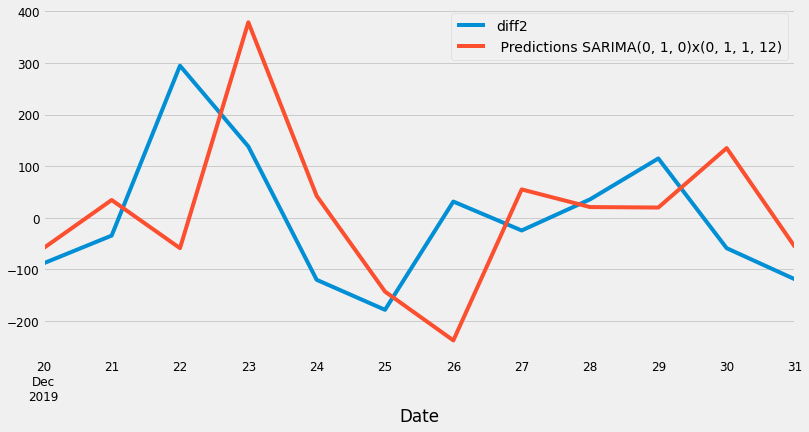

In [338]:
ax = test.plot(figsize=(12,6))
predictions.plot()
ax.autoscale(axis='x',tight=True)
ax.legend()

In [358]:
mse_value = mean_squared_error(test, predictions)
rmse_value = rmse(test, predictions)
mape_value = mean_absolute_percentage_error(test, predictions)
print(f'MSE Error: {mse_value:11.10}')
print(f'RMSE Error: {rmse_value:11.10}')
print(f'MAPE Error: {mape_value:11.10}')

MSE Error: 28868.52483
RMSE Error: 169.9074008
MAPE Error:  197.428041


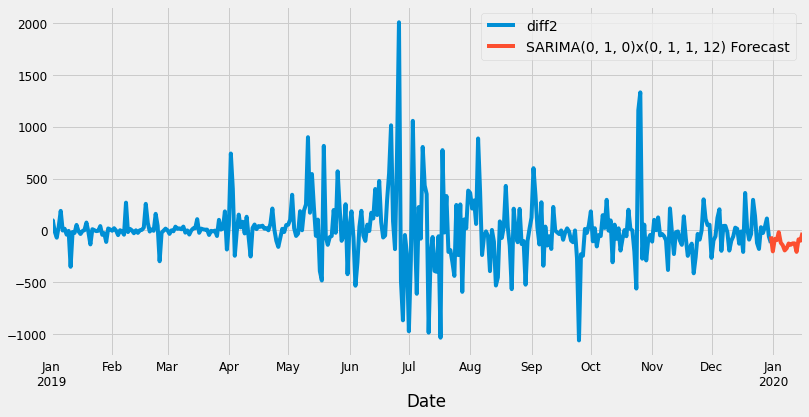

In [340]:
model = SARIMAX(df["2019"].diff2, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results = model.fit()
results.summary()
fcast = results.predict(len(df["2019"].diff2)-1,len(df["2019"].diff2)+15,typ='levels')\
 .rename('SARIMA(0, 1, 0)x(0, 1, 1, 12) Forecast')
ax = df["2019"].diff2.plot(figsize=(12,6))
fcast.plot()
ax.legend()

<AxesSubplot:xlabel='Date'>

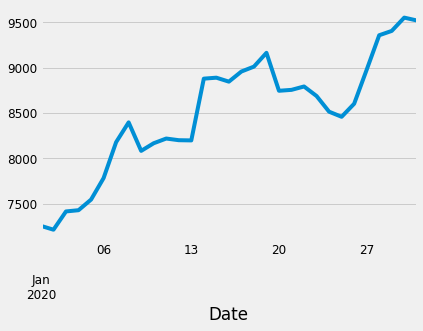

In [341]:
df["2020-01"].High.plot()

In [357]:
mse_value = mean_squared_error(df["2019"].diff2.iloc[len(df["2019"].diff2)-17:], fcast)
rmse_value = rmse(df["2019"].diff2.iloc[len(df["2019"].diff2)-17:], fcast)
mape_value = mean_absolute_percentage_error(df["2019"].diff2.iloc[len(df["2019"].diff2)-17:], fcast)
print(f'MSE Error: {mse_value:11.10}')
print(f'RMSE Error: {rmse_value:11.10}')
print(f'MAPE Error: {mape_value:11.10}')

MSE Error: 44580.79877
RMSE Error: 211.1416557
MAPE Error: 295.4772685


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


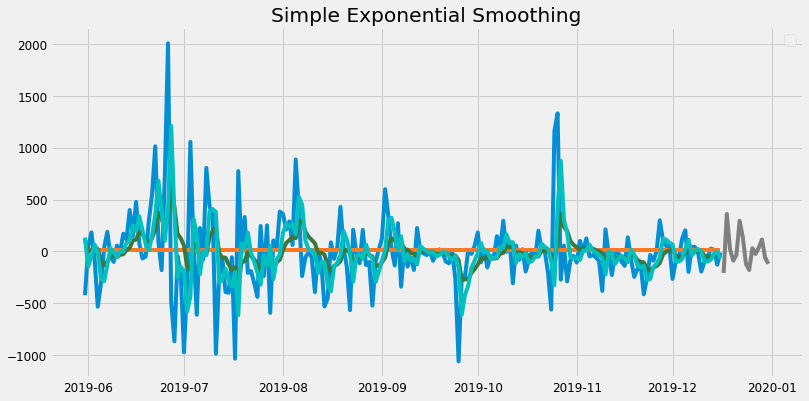

In [388]:
#еще модели прогнозов
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

train = df["2019"].diff2.iloc[:len(df["2019"].diff2)-15]
test = df["2019"].diff2.iloc[len(df["2019"].diff2)-15:]

model = SimpleExpSmoothing(train)

fit1 = model.fit()
pred1 = fit1.forecast(15)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(15)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(15)



fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[150:], train.values[150:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();

In [389]:
mse_value = mean_squared_error(test, pred1)
rmse_value = rmse(test, pred1)
mape_value = mean_absolute_percentage_error(test, pred1)
print(f'MSE Error: {mse_value:11.10}')
print(f'RMSE Error: {rmse_value:11.10}')
print(f'MAPE Error: {mape_value:11.10}')

MSE Error: 24496.81934
RMSE Error: 156.5145978
MAPE Error:  99.5890015


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


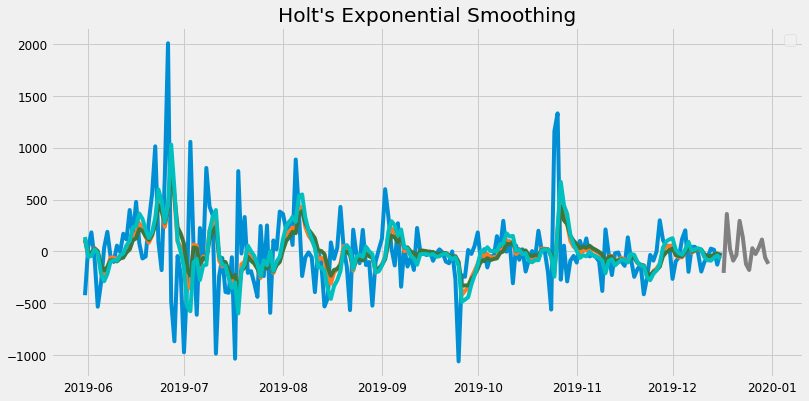

In [395]:
#еще модели прогнозов

pred = test.copy()

    
model = Holt(train)

fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(15)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(15)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(15)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[150:], train.values[150:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    #ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

In [396]:
mse_value = mean_squared_error(test, pred1)
rmse_value = rmse(test, pred1)
mape_value = mean_absolute_percentage_error(test, pred1)
print(f'MSE Error: {mse_value:11.10}')
print(f'RMSE Error: {rmse_value:11.10}')
print(f'MAPE Error: {mape_value:11.10}')

MSE Error: 27363.53044
RMSE Error: 165.4192566
MAPE Error: 114.3510045


### Знакомство с данными.

Этот блок посвящен первоначальному знакомству с данными

Наша задача - посмотреть на данные методами .info(), а также изучить их визуально.

Будет удобно рассматривать определенный блок - одну страну, один месяц одной страны.

Здесь же надо определиться с описанием данных - лучше всего для себя пояснить, с чем мы имеем дело. В данном случае столбцов слишком много, поэтому необходимо описать только самое важное - максимум 7-8 столбцов.

Как только у нас есть информация, что данные получены без ошибок, а также есть самое общее представление о содержимом, мы можем перейти к следующему пункту..

## Предобработка данных

### Фильтрация данных

Обычно фильтрацию данных делают позже - когда нужно непосредственно работать с данными. В нашем случае это неудобно: у нас условие, по которому мы выбираем какой-либо параметр 

С другой стороны, столбцов в задании может быть многовато. Поэтому на этом этапе нам нужно избавиться от всех ненужных столбцов. Чтобы понять, какие столбцы нужны - лучше всего вспомнить суть задачи. 


По итогу у нас должен остаться небольшой **датасет**.

### Обработка пропусков

В этом блоке мы должны понять - почему у нас есть пропуски. Главный вопрос - какова их природа? 

После того, как мы это поймем, мы можем принять решение относительно заполнения пропусков.

Главный момент: **в рамках этого задания мы не удаляем ничего, связанного с пропусками!**

Главная причина - характер работы с данными: мы работаем в этой задаче с временным промежутком, и нам важно, чтобы не было отсутствующих дат. К примеру, ситуация, когда у нас есть пропуск продолжительностью от 1 до 3 дней в середине временного промежутка, попросту неприемлима.

После обработки пропусков нам обязательно нужно проверить - всё ли в порядке. Выведите данные и проверьте заполненность. Зафиксируйте то, что пропусков больше нет.

### Вывод по этапу.


## EDA или разведочный анализ данных.

В данном блоке наша задача - познакомиться "поближе" с данными, которыми мы располагаем.

Что лучше всего сделать:    
- Сделать столбец с датами индексом;
- Вывести статистику по нужным столбцам;
- Построить графическое отображение столбцов;
- Попробовать определить - есть ли столбцы, которые мы можем отфильтровать (к примеру, самые ранние записи, где информации могло не быть и где были NaN). **- такого может и не быть**


Проделав действия выше, мы выполним минимум, необходимый для дальнейшей работы. 

Помимо этой информации, здесь же нужно всесторонне познакомиться с рассматриваемыми данными в контексте процесса/явления.

Хорошо здесь описать всё, что влияет на метрику, и что может нам помочь определить следующее: можем ли мы достоверно предсказать рост или падение метрики на основании одной переменной? Или здесь нужны методы посложнее, с большим числом входных данных и зависимостей?

Отвечайте на вопросы честно! 

Как только мы поняли, что описанной информации достаточно - можно перейти к следующему пункту.

## Построение моделей, анализ результатов.

Данный блок содержит в себе решение поставленной задачи.

В прошлых блоках мы убедились в целостности данных, их логичности, а также в том, что мы понимаем, с чем мы имеем дело. 

На этом этапе у нас должен быть объект типа DataFrame или Series, где индекс - даты, а в значениях находится нужная информация. То есть временной ряд.

В данном блоке у нас должно быть от трёх до четырех подглав:    
- Разделение датасета на тренировочную и тестовую (валидационную) выборки, проверка на статичность, построение графиков автокорреляции и частичной автокорреляции, разбивка на сезонность и тренд.
- Применение 1 способа прогнозирования;
- Применение 2 способа прогнозирования;
- (Применение 3 способа прогнозирования); **По желанию**

Первый пункт - разделение датасета - универсален, данные из него не нужно обновлять или заного рассчитывать.

Остальные три пункта содержат примерно одинаковый алгоритм действий:    
1. Описываем вкратце модель.
2. Создаем модель.
3. Обучаем модель.
4. Создаем прогноз.
5. Сравниваем прогноз и предсказание. 
6. Рассчитываем качество полученной модели и прогноза.
7. Делаем выводы по прогнозу.


Какие модели у нас есть:
- В рамках курса мы рассмотрели модель ARIMA, её улучшенную версию SARIMA. Обязательно попробуйте использовать эту модель;
- Модель экспаненционного сглаживающего среднего;
- Модель Хольта-Винтерса.

Последние 2 модели мы не изучали, поэтому можно попробовать использовать составные от модели ARIMA, которые мы рассматривали в лекции - AR, MA.

После получения прогноза отобразите графики **прогноз vs факт**, чтобы визуально можно было посмотреть на то, как точно построен прогноз. 

Как понять, подходит ли модель. Попробуйте использовать следующие методы рассчета ошибки:
- MAPE или средняя абсолютная ошибка в процентах.
- RMSE - квадратный корень из среднеквадратичной ошибки.
- MSE - среднеквадратичный корень (связан  с RMSE).

В конце - сравните полученные метрики с ошибками и выберите ту модель, которая точнее всего создает прогноз.

Ещё один важный момент - горизонт прогнозирования и сравнение прогноза с данными. Горизонт планирования нужно сделать небольшим - примерно 10-15 наблюдений (то есть 10-15 дней). И в ошибку нужно сравнивать с таким же числом наблюдений за тот же период по реальным данным!

Также отмечу, что прогноз, скорее всего, будет не самым точным, а возможно, он совсем покажет что-то непонятное.

## Выводы

В данном блоке опишите общие выводы по работе: что было сделано, что было получено. Помните, отрицательный результат - тоже результат. Поэтому указывайте информацию честно и беспристратно. 